In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [3]:
gss_data = pd.read_stata('data/GSS2012merged_R5.dta', convert_categoricals=False)
gss_data.head()

,year,id,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
0,2012,1,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2012,2,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,3,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,4,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,5,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
gss_data.index = gss_data['id']
gss_data.drop('id', 1, inplace=True)
gss_data.head()

,year,wrkstat,hrs1,hrs2,evwork,wrkslf,wrkgovt,occ10,indus10,marital,...,getmar,getmar1,hapornot,grnsign,grnmoney,grndemo,grncon,finan4,enprbus,enprbfam
id,,,,,,,,,,,,,,,,,,,,,
1,2012,2.0,15.0,NaN,NaN,2.0,2.0,4800.0,7470.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2012,2.0,30.0,NaN,NaN,2.0,2.0,2900.0,770.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012,1.0,60.0,NaN,NaN,2.0,2.0,1320.0,6070.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2012,8.0,NaN,NaN,1.0,2.0,2.0,800.0,6990.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2012,5.0,NaN,NaN,1.0,2.0,1.0,3800.0,9470.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


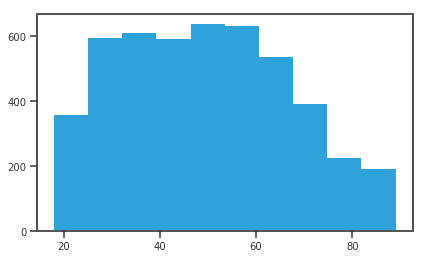

In [17]:
gss_data['age'].hist()
plt.grid()
plt.locator_params(nbins=5)

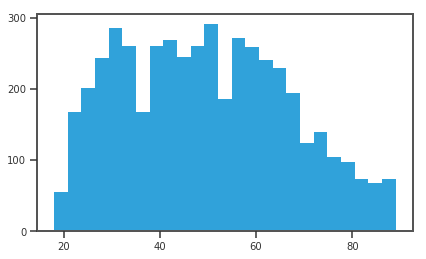

In [18]:
gss_data['age'].hist(bins=25)
plt.grid()
plt.locator_params(nbins=5)

In [19]:
inc_age = gss_data[['realrinc', 'age']]
inc_age.head(10)

,realrinc,age
id,,
1,NaN,22.0
2,NaN,21.0
3,58800.0,42.0
4,NaN,49.0
5,NaN,70.0
6,NaN,50.0
7,NaN,35.0
8,NaN,24.0
9,NaN,28.0


In [20]:
inc_age = gss_data[['realrinc', 'age']].dropna()
inc_age.head(10)

,realrinc,age
id,,
3,58800.0,42.0
10,15925.0,28.0
12,3185.0,36.0
15,7962.5,52.0
16,26950.0,35.0
17,26950.0,36.0
18,22050.0,47.0
19,33075.0,55.0
23,33075.0,54.0


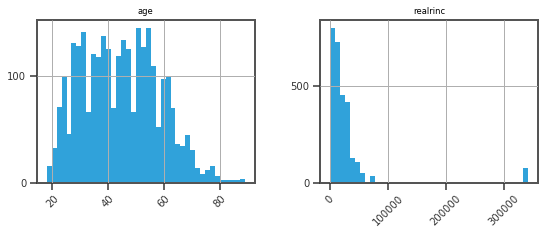

In [22]:
ax_list = inc_age.hist(bins=40, figsize=(8,3), xrot=45)
for ax in ax_list[0]:
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

In [23]:
inc_age[inc_age['realrinc'] > 3.0E5].count()

realrinc    80
age         80
dtype: int64

In [24]:
inc_age[inc_age['realrinc'] > 3.0E5].head()

,realrinc,age
id,,
43,341672.3793,51.0
44,341672.3793,57.0
45,341672.3793,44.0
48,341672.3793,68.0
55,341672.3793,46.0


AttributeError: Unknown property figszie

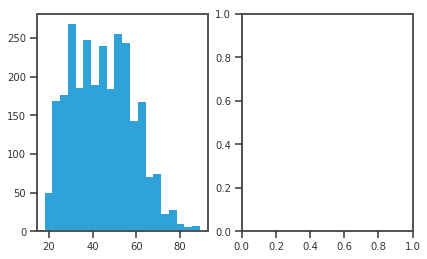

In [32]:
inc_age = gss_data[['realrinc', 'age']].dropna()
lowinc_age = inc_age[inc_age['realrinc'] < 3.0E5]
ax_list = lowinc_age.hist(bins=20, figszie=(10,5), xrot=45)
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=3)

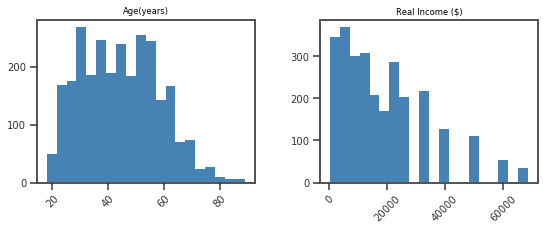

In [34]:
ax_list = lowinc_age.hist(bins=20, figsize=(8,3), xrot=45, color='SteelBlue')
ax1, ax2 = ax_list[0]
ax1.set_title('Age(years)')
ax2.set_title('Real Income ($)')
for ax in ax_list[0]:
    ax.grid()
    ax.locator_params(axis='x', nbins=6)
    ax.locator_params(axis='y', nbins=4)

Text(0.5,0,'Age (years)')

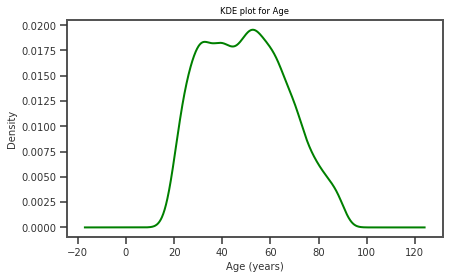

In [36]:
age = gss_data['age'].dropna()
age.plot(kind='kde', lw=2, color='Green')
plt.title('KDE plot for Age')
plt.xlabel('Age (years)')

/Users/dongfanghu/miniconda3/envs/bioinfo/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,0,'Age (years)')

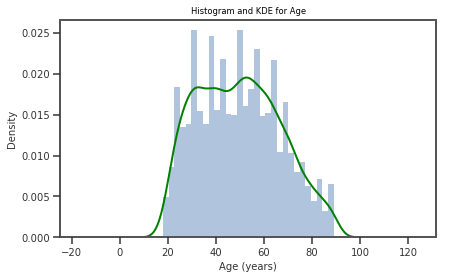

In [38]:
ax = age.hist(bins=30, color='LightSteelBlue', normed=True)
age.plot(kind='kde', lw=2, color='Green', ax=ax)
plt.title('Histogram and KDE for Age')
plt.xlabel('Age (years)')

((array([-3.62347833, -3.38741543, -3.25727154, ...,  3.25727154,
          3.38741543,  3.62347833]),
  array([18., 18., 18., ..., 89., 89., 89.])),
 (16.994985855046277, 49.59467393583561, 0.9882188072238004))

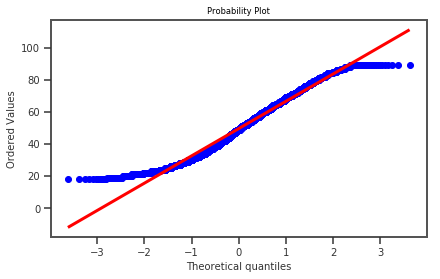

In [39]:
import scipy.stats as stats
stats.probplot(age, dist='norm', plot=plt)

In [41]:
inc = gss_data['realrinc'].dropna()
lowinc = inc[inc < 3.0E5]
lowinc.describe()

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
25%       6737.500000
50%      15925.000000
75%      26950.000000
max      68600.000000
Name: realrinc, dtype: float64

In [42]:
lowinc.describe(percentiles=np.arange(0,1.0, 0.1))

count     2751.000000
mean     18582.194656
std      14841.581333
min        245.000000
0%         245.000000
10%       2695.000000
20%       5512.500000
30%       9187.500000
40%      11637.500000
50%      15925.000000
60%      18375.000000
70%      22050.000000
80%      26950.000000
90%      40425.000000
max      68600.000000
Name: realrinc, dtype: float64

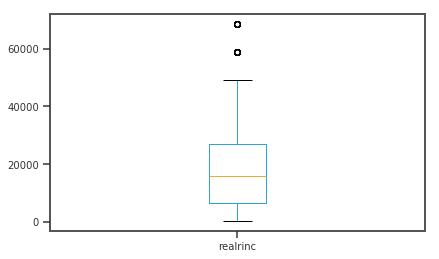

In [43]:
lowinc.plot(kind='box')
plt.locator_params(nbins=5)

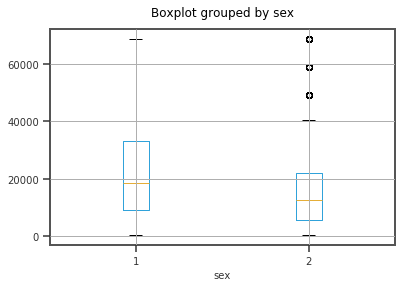

In [44]:
inc_gen = gss_data[['realrinc','sex']]
inc_gen = inc_gen[inc_gen['realrinc'] < 3.0E5]
inc_gen.boxplot(column='realrinc', by='sex')
plt.title('')
plt.locator_params(nbins=5)

In [45]:
hubble_data = pd.read_csv('data/hubble.csv', skiprows=2, names=['id', 'r', 'v'])
hubble_data.head()

,id,r,v
0,SMC,0.032,170
1,5194,0.500,270
2,1055,1.100,450
3,LMC,0.034,290
4,4449,0.630,200


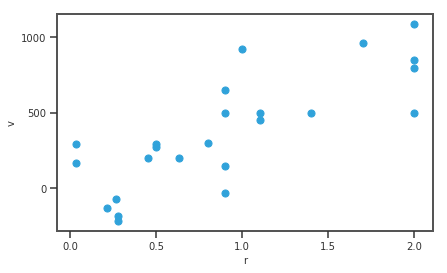

In [46]:
hubble_data.plot(kind='scatter', x='r', y='v', s=50)
plt.locator_params(nbins=5)

In [49]:
from scipy.stats import linregress
rv = hubble_data.as_matrix(columns=['r', 'v'])
a, b, r, p, stderr = linregress(rv)
print(a, b, r, p, stderr)

AttributeError: 'DataFrame' object has no attribute 'as_matrix'

NameError: name 'a' is not defined

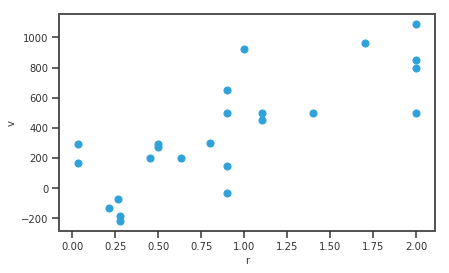

In [50]:
hubble_data.plot(kind='scatter', x='r', y='v', s=50)
rdata = hubble_data['r']
rmin, rmax = min(rdata), max(rdata)
rvalues = np.linspace(rmin, rmax, 200)
yvalues = a * rvalues + b
plt.plot(rvalues, yvalues, color='IndianRed', lw=2)
plt.locator_params(nbins=5)